<a href="https://colab.research.google.com/github/NTKhoii/DS102.P21_Lab_4/blob/main/Lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import thư viện cần thiết

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cài đặt thuật toán:
- K-means
- Hàm tính tổng bình phương khoảng cách các điểm
- Hàm Elbow_method để chọn ra k tối ưu
- Hàm trực quan hoá cụm

In [ ]:
class KMeans:
    def __init__(self, n_clusters=3, max_iters=100, tol=1e-4, random_state=None):
        self.n_clusters = n_clusters
        self.max_iters = max_iters
        self.tol = tol
        self.random_state = random_state
        self.centroids = None
        self.labels = None

    def initialize_centroids(self, X):
        if self.random_state:
            np.random.seed(self.random_state)
        indices = np.random.choice(X.shape[0], self.n_clusters, replace=False)
        return X[indices]

    def assign_clusters(self, X, centroids):
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        return np.argmin(distances, axis=1)

    def update_centroids(self, X, labels):
        return np.array([X[labels == i].mean(axis=0) for i in range(self.n_clusters)])

    def has_converged(self, old_centroids, new_centroids):
        return np.linalg.norm(old_centroids - new_centroids) < self.tol

    def fit(self, X):
        self.centroids = self.initialize_centroids(X)

        for i in range(self.max_iters):
            self.labels = self.assign_clusters(X, self.centroids)
            new_centroids = self.update_centroids(X, self.labels)

            if self.has_converged(self.centroids, new_centroids):
                break

            self.centroids = new_centroids

    def predict(self, X):
        return self.assign_clusters(X, self.centroids)

In [42]:
def compute_inertia(X, labels, centroids):
    """
    Tính tổng khoảng cách bình phương (inertia) từ mỗi điểm đến centroid của cụm nó thuộc về.
    """
    inertia = 0
    for i in range(len(centroids)):
        cluster_points = X[labels == i]
        inertia += ((cluster_points - centroids[i])**2).sum()
    return inertia

In [45]:
def elbow_method(X, k_min=1, k_max=10, max_iters=100, tol=1e-4, random_state=None):
    """
    Thực hiện Elbow Method để tìm số lượng cụm tối ưu cho thuật toán K-Means.

    Tham số:
    - X: Dữ liệu đầu vào (numpy array)
    - k_min: Giá trị nhỏ nhất của số cụm (mặc định: 1)
    - k_max: Giá trị lớn nhất của số cụm (mặc định: 10)
    - max_iters: Số lần lặp tối đa trong mỗi lần huấn luyện KMeans
    - tol: Ngưỡng hội tụ cho centroid
    - random_state: seed để cố định kết quả khởi tạo

    Trả về:
    - Danh sách inertia tương ứng với từng giá trị k
    - Đồ thị Elbow plot
    """
    inertias = []
    k_values = range(k_min, k_max + 1)

    for k in k_values:
        model = KMeans(n_clusters=k, max_iters=max_iters, tol=tol, random_state=random_state)
        model.fit(X)
        inertia = compute_inertia(X, model.labels, model.centroids)
        inertias.append(inertia)
        print(f"K = {k}, Inertia = {inertia:.2f}")

    # Vẽ biểu đồ Elbow
    plt.figure(figsize=(6, 4))
    plt.plot(k_values, inertias, 'o-', color='blue')
    plt.xlabel('Số cụm (k)')
    plt.ylabel('Inertia')
    plt.title('Elbow Method - Xác định số cụm tối ưu')
    plt.grid(True)
    plt.show()

    return inertias

In [35]:
def visualize_kmeans(X, label, centroids):
    """
    Trực quan hóa kết quả phân cụm KMeans và vẽ các centroid.

    Tham số:
    - X: dữ liệu (numpy array)
    - label: nhãn cụm cho mỗi điểm
    - centroids: tọa độ các centroid
    """
    # Convert centroids to a NumPy array
    centroids = np.array(centroids) # This line converts the centroids tuple to a numpy array to enable slicing

    # Chia dữ liệu thành 3 cụm dựa vào label
    X0 = X[label == 0, :]
    X1 = X[label == 1, :]
    X2 = X[label == 2, :]

    # Vẽ các điểm dữ liệu của từng cụm
    plt.plot(X0[:, 0], X0[:, 1], 'bo', markersize=2, label='Cluster 0')
    plt.plot(X1[:, 0], X1[:, 1], 'r^', markersize=2, label='Cluster 1')
    plt.plot(X2[:, 0], X2[:, 1], 'gs', markersize=2, label='Cluster 2')

    # Vẽ centroid (dấu X đen)
    plt.plot(centroids[:, 0], centroids[:, 1], 'kx', markersize=10, markeredgewidth=2, label='Centroids')

    plt.axis('equal')
    plt.legend()
    plt.title('K-Means Clustering with Centroids')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.grid(True)
    plt.show()

# Assignment 1

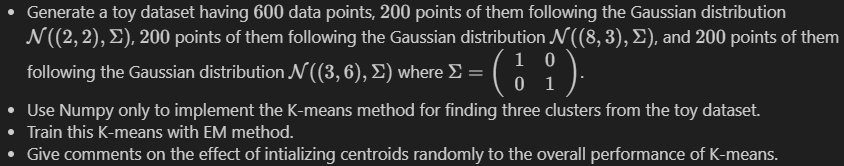

## Tạo dữ liệu gồm theo yêu cầu

In [13]:
# Thiết lập seed để đảm bảo kết quả giống nhau khi chạy lại
np.random.seed(42)

# Ma trận hiệp phương sai (covariance matrix)
Sigma = np.array([[1, 0], [0, 1]])
centroid_1 = [2,2]
centroid_2 = [8,3]
centroid_3 = [3,6]

# Tạo 3 cụm điểm
cluster1 = np.random.multivariate_normal(mean=centroid_1, cov=Sigma, size=200)
cluster2 = np.random.multivariate_normal(mean=centroid_2, cov=Sigma, size=200)
cluster3 = np.random.multivariate_normal(mean=centroid_3, cov=Sigma, size=200)

# Kết hợp lại thành 1 tập dữ liệu
X=np.concatenate((cluster1, cluster2, cluster3),axis=0)

In [30]:
N = 200
labels=np.array([0]*N+[1]*N+[2]*N)

In [31]:
X.shape

(600, 2)

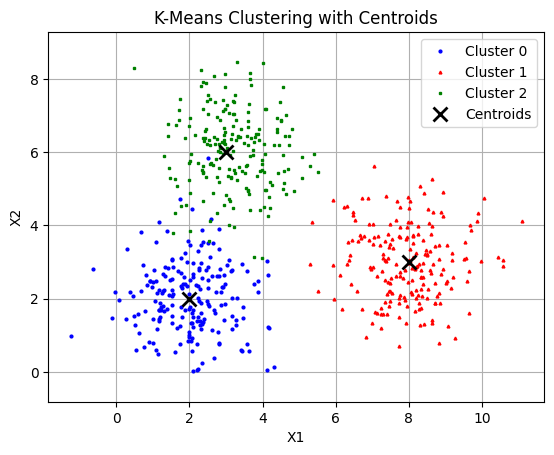

In [36]:
visualize_kmeans(X, labels, [centroid_1, centroid_2, centroid_3])

## Huấn luyện bằng phương pháp Expectation-Maximization (EM).


In [37]:
model = KMeans()

In [38]:
model.fit(X)

In [39]:
centroid = model.centroids
labels = model.labels

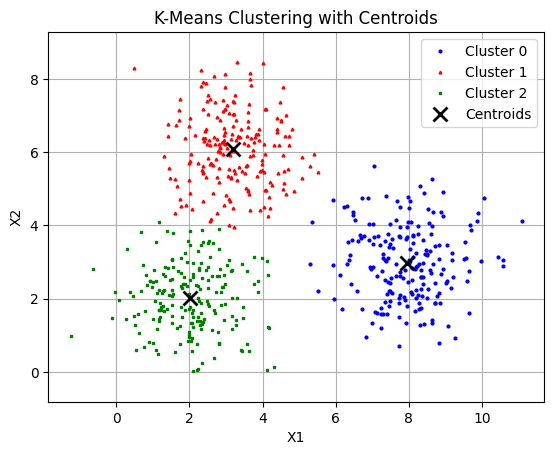

In [41]:
visualize_kmeans(X, labels, centroid)

In [43]:
# Gọi sau khi đã fit mô hình
inertia = compute_inertia(X, model.labels, model.centroids)
print(f"Inertia (tổng khoảng cách bình phương): {inertia:.2f}")

Inertia (tổng khoảng cách bình phương): 1121.84


K = 1, Inertia = 6873.14
K = 2, Inertia = 2924.16
K = 3, Inertia = 1121.86
K = 4, Inertia = 982.70
K = 5, Inertia = 890.59
K = 6, Inertia = 763.64
K = 7, Inertia = 658.60
K = 8, Inertia = 564.15
K = 9, Inertia = 581.86
K = 10, Inertia = 444.21


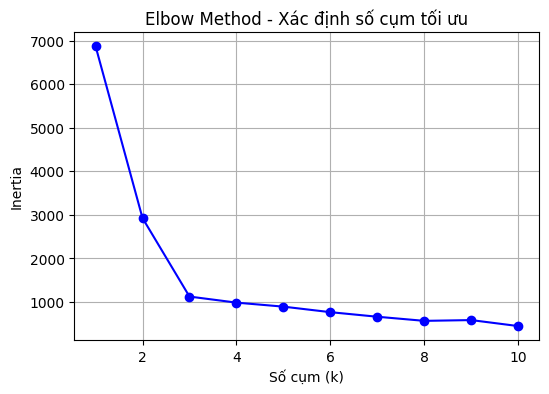

[np.float64(6873.144637725138),
 np.float64(2924.1617369190526),
 np.float64(1121.8591524950416),
 np.float64(982.695734518144),
 np.float64(890.5915795276098),
 np.float64(763.6398125229182),
 np.float64(658.602416602352),
 np.float64(564.1454284546774),
 np.float64(581.8612919336682),
 np.float64(444.20965331940965)]

In [46]:
elbow_method(X)

## Bình luận về ảnh hưởng của việc khởi tạo tâm cụm ngẫu nhiên.
- Kết quả K-means phụ thuộc mạnh vào khởi tạo ban đầu
- Nếu centroid ban đầu gần đúng với trung tâm của các cụm thực sự -> kết quả tốt
- Bộ dữ liệu được tạo là 3 cụm Gaussian phân bố tách biệt -> Kmeans hoạt động hiệu quả
- Dựa vào Elbow Method thì số cụm tối ưu K được xác định là 3 là tối ưu

# Assignment 2

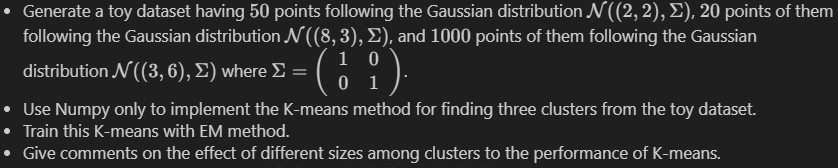

## Tạo dữ liệu gồm theo yêu cầu

In [56]:
#tạo dữ liệu theo yêu cầu
Sigma = [[1,0], [0,1]]
centroid_1 = [2,2]
centroid_2 = [8,3]
centroid_3 = [3,6]
cluster4 = np.random.multivariate_normal(centroid_1,Sigma,50)
cluster5 = np.random.multivariate_normal(centroid_2,Sigma,20)
cluster6 = np.random.multivariate_normal(centroid_3,Sigma,1000)

X_2=np.concatenate((cluster4,cluster5,cluster6),axis=0)
labels_2=np.array([0]*50+[1]*20+[2]*1000)

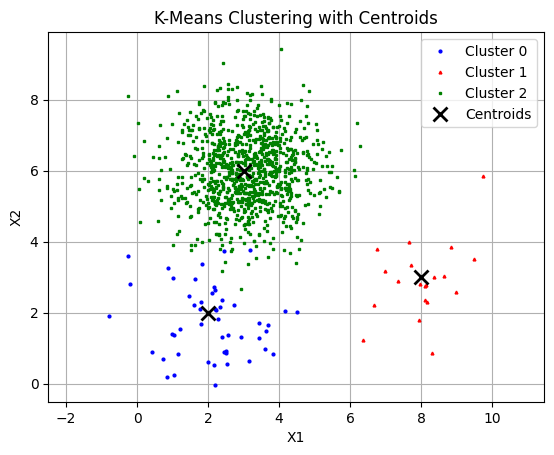

In [57]:
# Trước khi dùng kmean
visualize_kmeans(X_2, labels_2, [centroid_1, centroid_2, centroid_3])

## Huấn luyện bằng phương pháp Expectation-Maximization (EM).

In [58]:
model_2 = KMeans()
model_2.fit(X_2)

In [59]:
centroids_2 = model_2.centroids
labels_2 = model_2.labels

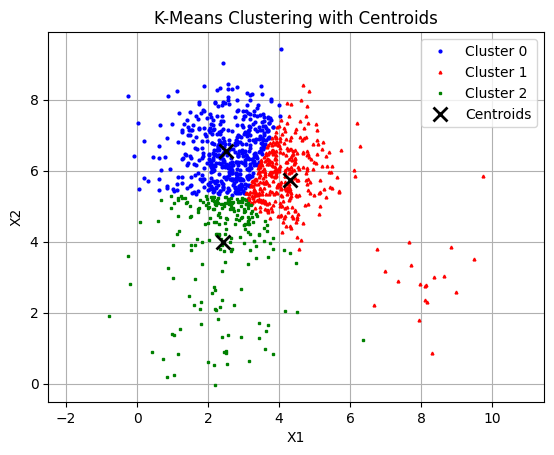

In [60]:
#Sau khi dùng Kmeans
visualize_kmeans(X_2, labels_2, centroids_2)

K = 1, Inertia = 3789.94
K = 2, Inertia = 2630.43
K = 3, Inertia = 1959.03
K = 4, Inertia = 1536.30
K = 5, Inertia = 1070.98
K = 6, Inertia = 875.77
K = 7, Inertia = 749.05
K = 8, Inertia = 645.51
K = 9, Inertia = 595.70
K = 10, Inertia = 543.40


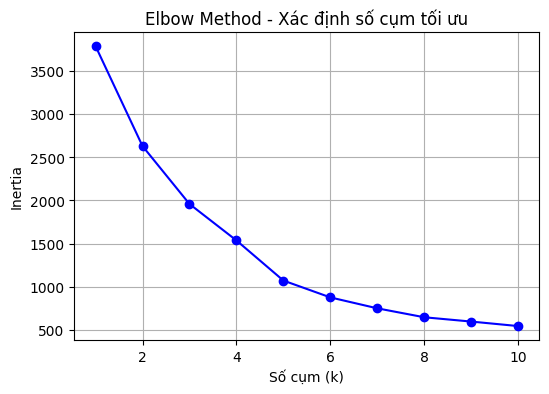

[np.float64(3789.9390377656314),
 np.float64(2630.428250427768),
 np.float64(1959.0306605899239),
 np.float64(1536.2958214533298),
 np.float64(1070.9804213484254),
 np.float64(875.7734891928682),
 np.float64(749.0527451688413),
 np.float64(645.5142728450375),
 np.float64(595.703710057111),
 np.float64(543.4000473211989)]

In [61]:
elbow_method(X_2)

## Bình luận về ảnh hưởng của việc khởi tạo tâm cụm ngẫu nhiên theo cách 2.

- Ở bài tập 2 ta khởi tạo: 50 điểm quanh [2,2], 20 điểm quanh [8,3], 1000 điểm quanh [3,6]. 3 nhóm có độ chệnh lệch lớn.
- Sau khi áp dụng Kmeans, mặc dù dữ liệu gốc có 3 cụm rõ ràng nhưng không giống nhãn gốc.
- Thuật toán K-Means đã nhóm lại theo hình dạng và mật độ phân bố không gian, thay vì kích thước cụm gốc.
- Cụm có 1000 điểm (trung tâm [3, 6]) đã bị chia tách, do K-Means cố gắng cân bằng khoảng cách đến các centroid.
- Cụm [8, 3] quá nhỏ → gần như bị hấp thụ vào cụm khác hoặc không được gán riêng biệt.

# Assignment 3

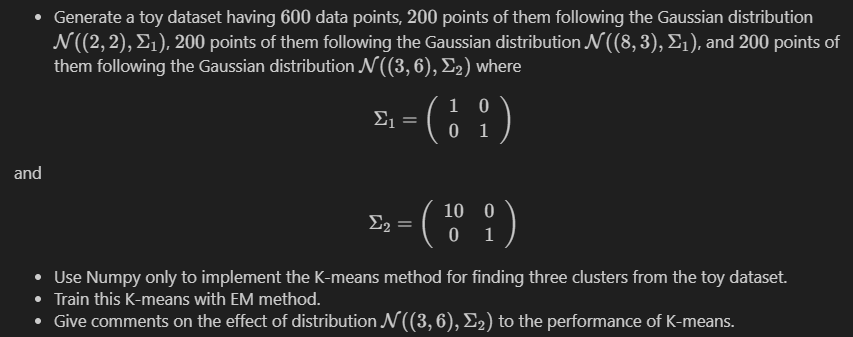

## Tạo dữ liệu gồm theo yêu cầu

In [63]:
#tạo dữ liệu theo yêu cầu
Sigma1=[[1,0],[0,1]]
Sigma2=[[10,0],[0,1]]
centroid_1 = [2,2]
centroid_2 = [8,3]
centroid_3 = [3,6]
cluster7 = np.random.multivariate_normal([2,2],Sigma1,200)
cluster8 = np.random.multivariate_normal([8,3],Sigma1,200)
cluster9 = np.random.multivariate_normal([3,6],Sigma2,200)
X_3=np.concatenate((cluster7,cluster8,cluster9),axis=0)
labels_3=np.array([0]*200+[1]*200+[2]*200)

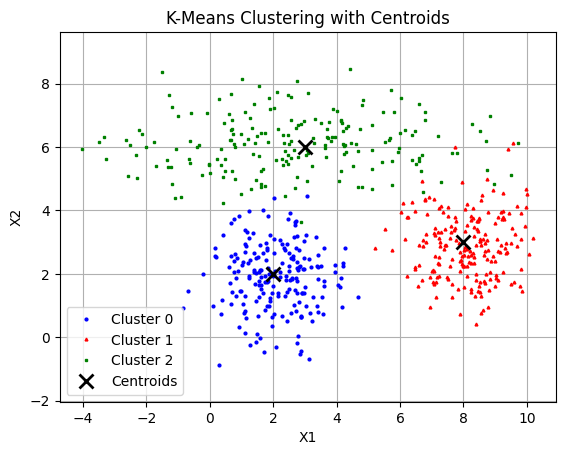

In [65]:
visualize_kmeans(X_3, labels_3,  [centroid_1, centroid_2, centroid_3])

## Huấn luyện bằng phương pháp Expectation-Maximization (EM).

In [66]:
model_3 = KMeans()
model_3.fit(X_3)

In [70]:
centroids = model_3.centroids
labels = model_3.labels

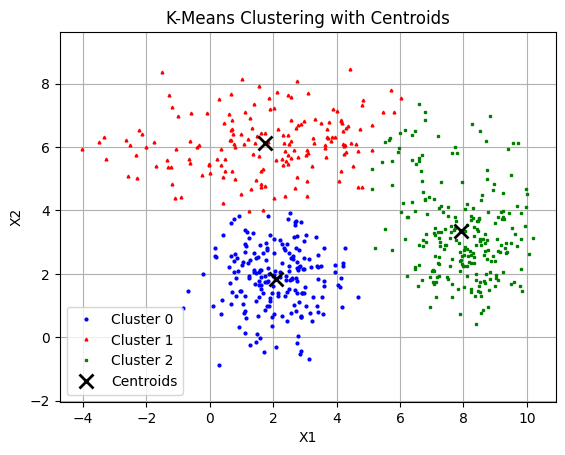

In [72]:
visualize_kmeans(X_3, labels, centroids)

K = 1, Inertia = 8979.67
K = 2, Inertia = 3761.19
K = 3, Inertia = 2138.03
K = 4, Inertia = 1472.19
K = 5, Inertia = 1248.62
K = 6, Inertia = 1107.66
K = 7, Inertia = 1000.35
K = 8, Inertia = 827.71
K = 9, Inertia = 767.54
K = 10, Inertia = 681.03


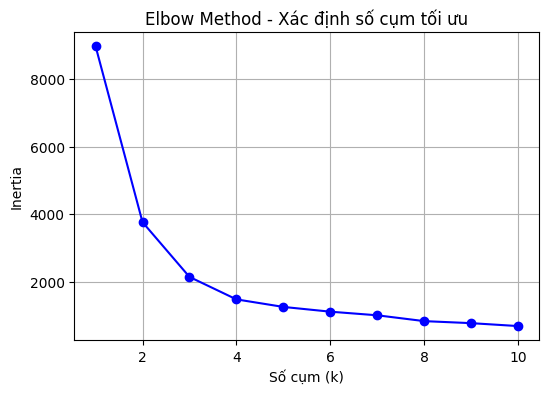

[np.float64(8979.667426659462),
 np.float64(3761.1877618862204),
 np.float64(2138.0344690880784),
 np.float64(1472.1927618400791),
 np.float64(1248.6242975782202),
 np.float64(1107.6586794801303),
 np.float64(1000.3489392082181),
 np.float64(827.707635261556),
 np.float64(767.537359201628),
 np.float64(681.0298782979654)]

In [73]:
elbow_method(X_3)

## Bình luận về độ ảnh hưởng của việc khởi toạ tâm cụm ngẫu nhiên theo cách 3

Dữ liệu gồm 3 cụm (clusters), mỗi cụm gồm 200 điểm.

Các cụm có trung tâm là:

cluster7: (2, 2), covariance: đơn vị (đều nhau theo mọi hướng)

cluster8: (8, 3), covariance: đơn vị (đều nhau theo mọi hướng)

cluster9: (3, 6), covariance: [10, 1] → tức là trải rộng hơn nhiều trên trục X

- Quan sát:

Cụm đỏ và xanh dương rất gọn và tách biệt.

Cụm xanh lá (trung tâm tại (3, 6)) bị kéo dài mạnh theo trục X, tạo hình oval nằm ngang.

Do đó, các điểm của cluster này lan gần về phía (2,2) và (8,3), khiến khoảng cách Euclidean không còn là yếu tố tốt để phân cụm rõ ràng.



- Sau khi áp dụng Kmeans:
Ta quan sát được:

Cluster (2,2) được gán đúng (cluster 0).

Cluster (8,3) cũng được nhận dạng tương đối chính xác (cluster 2).

Cluster (3,6) thì bị phân mảnh. Một phần điểm bị gán vào cluster (2,2) và một phần bị gán sang cluster (8,3).

Kết luận:

Trong tình huống các cụm có hình dạng không đồng nhất, đặc biệt khi phân phối có phương sai lớn, K-Means không phải lựa chọn tốt nhất.